Get usernames of all active users from each of 12 subreddits  
02/22/23  
[0]: # Path: recovery-network/get_data.ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
# do not print warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
dat_path = "/Users/laylabouzoubaa/Library/CloudStorage/OneDrive-DrexelUniversity/Social_NLP_Lab/Datasets/Reddit Drug Data- RAW - DNT/Central/data Dec 1st 2022/data 2018_1_1 to 2022_7_30_"
# subreddits = ["opiates", "benzodiazepines", "stims", "MDMA", "cannabis", "Psychedelics", "LSD", "shrooms", "cocaine", "Autoflowers", "ambien"]
# subreddits = ["opiates", "benzodiazepines", "stims", "MDMA", "Autoflowers"]
# subreddits = ["opiates", "benzodiazepines", "stims", "cannabis", "Psychedelics"]
subreddits = ["trees", "LSD", "benzodiazepines", "cocaine", "opiates"]

In [3]:
drug_info = ["Autoflowers"]
seek_exp = []
cont_use = ["ambien", "opiates", "cocaine", "benzodiazepines", "stims", "shrooms", "LSD", "cannabis", "Psychedelics"]
stop_use = []
harm_red = ["MDMA"]
misc = []

In [4]:
# get redditor info for each subreddit
users = pd.DataFrame()
for subreddit in subreddits:
    print(subreddit)
    try:
        df = pd.read_json(dat_path + subreddit + "_redditor.json", lines=True)
        df = df[1][0]
        df = pd.DataFrame(df)
        df["subreddit"] = subreddit
        if subreddit in cont_use:
            df["type"] = "IS_continue_use"
        elif subreddit in drug_info:
            df["type"] = "Drug_info"
        elif subreddit in harm_red:
            df["type"] = "Harm_reduction"
        # append to users
        users = users.append(df)
    except:
        print("No redditor data for " + subreddit)

trees
No redditor data for trees
LSD
benzodiazepines
cocaine
opiates


### Bot filtering

'Bot' in the name

In [6]:
# remove users with  "-bot" in their name
# users 974,309 rows
# reduced users to 322,793
bot_patterns = ["-bot", "AutoModerator", "Bot", "BOT", "B0T", "b0t", "b0T", "bOt", "_bot"]
users = users[~users["name"].str.contains('|'.join(bot_patterns))]
# 2023-04-17 reduced to just 5 main class of drugs

Extremely high post and comment karma or extremely negative karma

- sometimes the post and comment karma are the same, which is suspicious

In [7]:
# calculate the total karma
users["total_karma"] = users["comment_karma"] + users["post_karma"]

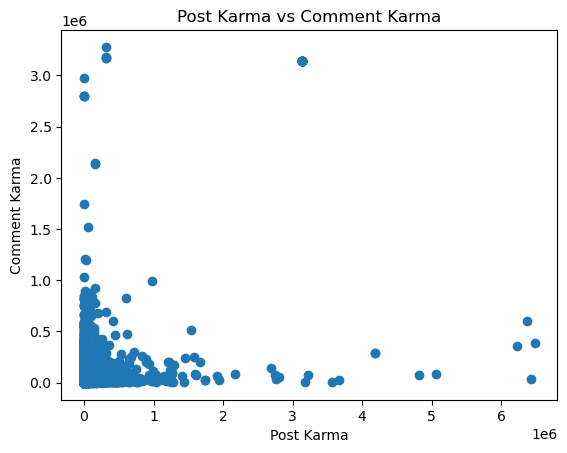

In [8]:
# scatter plot of post karma vs comment karma
plt.scatter(users["post_karma"], users["comment_karma"])
plt.xlabel("Post Karma")
plt.ylabel("Comment Karma")
plt.title("Post Karma vs Comment Karma")
plt.show()

Accounts with negative total karma are likely to be bots

In [9]:
# remove accounts with negative total karma
users = users[users["total_karma"] > 0]
# now 254,669 rows

In [10]:
# calculate the outlier cutoff
# calculate interquartile range
q25, q75 = np.percentile(users["total_karma"], 25), np.percentile(users["total_karma"], 75)
iqr = q75 - q25
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in users["total_karma"] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 35899


People with 0 post and comment karma are likely legitimate users but are lurkers and thus not useful for our purposes

In [11]:
# remove outliers
# users = users[users["post_karma"] < upper]

users = users[users["post_karma"] > lower]
# now 870,764 rows
# now 285,941


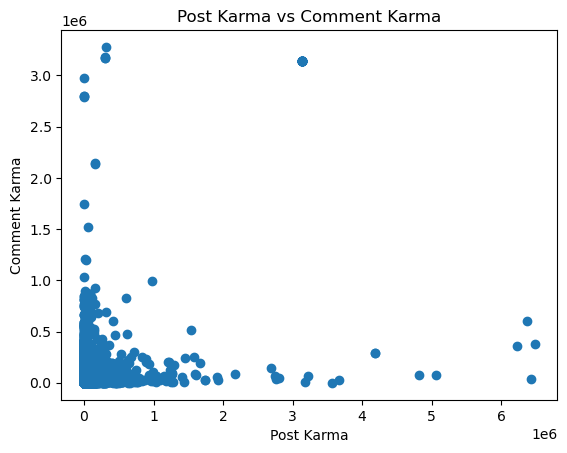

In [12]:
# plot again
plt.scatter(users["post_karma"], users["comment_karma"])
plt.xlabel("Post Karma")
plt.ylabel("Comment Karma")
plt.title("Post Karma vs Comment Karma")
plt.show()

---
### Get Metadata

In [12]:
# get metadata for each user
# import praw
# from pmaw import PushshiftAPI

# # source api credentials from file
# file = 'py/api-creds.py'
# exec(open(file).read())


In [23]:
# def get_user_subs(user_id):
#     redditor = reddit.redditor(user_id)
#     user_subs = []
#     for s in redditor.submissions.top(limit=None):
#         user_subs.append(s.subreddit.display_name)
#     return list(set(user_subs))

In [32]:
# test func
# test_s = get_user_subs("Greymarch")

---

### Multi-threading

In [33]:
# reddit1 = reddit
# reddit2 = reddit

In [19]:
# try using process
# from multiprocessing import Process, Queue, Lock
# import time
# import os

# num_processors = os.cpu_count()
# print(num_processors)
# num_threads = num_processors * 5


10


In [13]:
# get unique list of user ids
user_names = list(set(users["name"]))
print(len(user_names))

218044


In [16]:
# rake random sample of 20000 users
# user_names_rand = list(np.random.choice(user_names, 20000, replace=False))

---
Sampling

make sure that the sample is representative of the population
benzodiazepines - 136k, cannabis - 192k, opiates - 194k, stims - 127k, pyschdelics - 18k.
total: 667k users
proportions: 20.5%, 28.7%, 29.1%, 19.0%, 2.7%

In [14]:
# get 1000 random, unique users from each subreddit
# users5k = pd.DataFrame()
# for subreddit in subreddits:
#     print(subreddit)
#     df = users[users["subreddit"] == subreddit]
#     df = df.sample(n=1000, replace=False)
#     users5k = users5k.append(df)

opiates
benzodiazepines
stims
cannabis
Psychedelics


In [29]:
# get users from each subreddit that represent the proportion in the population
# total = 5000 users
prop = {"benzodiazepines":.205, "cannabis": .287, "opiates": .291, "Psychedelics": .19, "stims": .027}
users5k = pd.DataFrame()
for subreddit in subreddits:
    sample = int(prop[subreddit] * 5000)
    print(subreddit, sample)
    df = users[users["subreddit"] == subreddit]
    df = df.sample(n=sample, replace=False, random_state=1)
    users5k = users_prop.append(df)


opiates 1455
benzodiazepines 1025
stims 135
cannabis 1435
Psychedelics 950


In [30]:
# make sure the users are unique
users5k = users5k.drop_duplicates(subset="name", keep="first")
users5k_ls = users5k["name"].tolist()
# now 5000 rows

In [32]:
# store to json
with open("data/user_names5k.json", "w") as f:
    json.dump(users5k_ls, f)

In [34]:
# save users table pickle
users.to_pickle("data/users.pkl")